# Sydney Olsen - Artificial Neural Network and Deep Learning Final Project - 5/5/25

## Setting Up Project Environment & Accessing Dataset

In [22]:
!pip install kaggle

In [23]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sydneyolsen","key":"474f17d02f5203e58a2541e6f833359d"}'}

In [24]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
License(s): other
cifake-real-and-ai-generated-synthetic-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
import zipfile
import os

with zipfile.ZipFile("cifake-real-and-ai-generated-synthetic-images.zip", 'r') as zip_ref:
    zip_ref.extractall("cifake_dataset")

## Preprocessing

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
data_dir = 'cifake_dataset'

# Image parameters
IMG_HEIGHT, IMG_WIDTH = 64, 64
BATCH_SIZE = 32

In [29]:
# Create generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% val
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 96000 images belonging to 2 classes.
Found 24000 images belonging to 2 classes.


## Baseline Models

### Logistic Regression on Flattened Images

In [30]:
model_logistic = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_logistic.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_logistic = model_logistic.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 78s 26ms/step - accuracy: 0.8144 - loss: 0.5334 - val_accuracy: 0.7125 - val_loss: 0.5986
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 75s 25ms/step - accuracy: 0.8127 - loss: 0.5303 - val_accuracy: 0.8322 - val_loss: 0.4706
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 68s 23ms/step - accuracy: 0.8127 - loss: 0.5242 - val_accuracy: 0.8326 - val_loss: 0.4672
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.8142 - loss: 0.5312 - val_accuracy: 0.8333 - val_loss: 0.5036
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.8194 - loss: 0.5127 - val_accuracy: 0.8329 - val_loss: 0.4673
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 68s 23ms/step - accuracy: 0.8121 - loss: 0.5288 - val_accuracy: 0.8129 - val_loss: 0.5165
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.8150 - loss: 0.5192 - val_accuracy: 0.8313 - val_loss: 0.4691
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - accuracy: 0.8174 - loss: 0.51

### Classical CNN

In [31]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_cnn = model_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 617s 205ms/step - accuracy: 0.8336 - loss: 0.4575 - val_accuracy: 0.8333 - val_loss: 0.4506
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 612s 204ms/step - accuracy: 0.8331 - loss: 0.4522 - val_accuracy: 0.8333 - val_loss: 0.4518
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 605s 202ms/step - accuracy: 0.8326 - loss: 0.4528 - val_accuracy: 0.8333 - val_loss: 0.4532
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 609s 203ms/step - accuracy: 0.8351 - loss: 0.4482 - val_accuracy: 0.8333 - val_loss: 0.4519
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 612s 204ms/step - accuracy: 0.8324 - loss: 0.4520 - val_accuracy: 0.8333 - val_loss: 0.4531
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 644s 215ms/step - accuracy: 0.8338 - loss: 0.4498 - val_accuracy: 0.8333 - val_loss: 0.4529
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 611s 204ms/step - accuracy: 0.8330 - loss: 0.4502 - val_accuracy: 0.8333 - val_loss: 0.4554
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 611s 204ms/step - ac

## Evaluation of Baseline Models

750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step


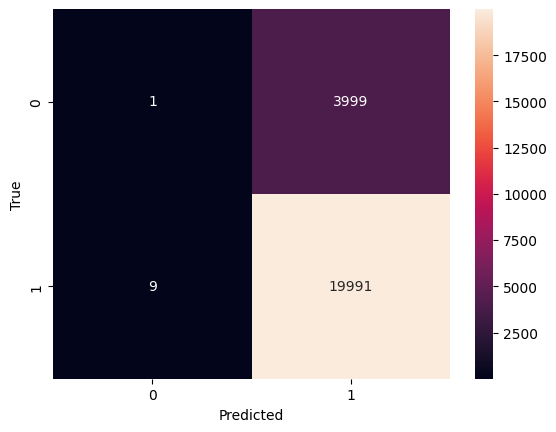

              precision    recall  f1-score   support

           0       0.10      0.00      0.00      4000
           1       0.83      1.00      0.91     20000

    accuracy                           0.83     24000
   macro avg       0.47      0.50      0.45     24000
weighted avg       0.71      0.83      0.76     24000



In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
Y_pred = model_cnn.predict(val_generator)
y_pred = np.round(Y_pred).flatten()

# True labels
y_true = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plots
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred))

## Custom CNN

In [33]:
from tensorflow.keras import layers, models, regularizers

In [34]:
def build_regularized_cnn(input_shape=(64, 64, 3)):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same',
                            kernel_regularizer=regularizers.l2(0.001),
                            input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Block 2
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Pooling + Classification
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)

In [36]:
model = build_regularized_cnn()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, lr_schedule]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 595s 197ms/step - accuracy: 0.8296 - loss: 0.4942 - val_accuracy: 0.8333 - val_loss: 0.4605 - learning_rate: 0.0010
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 624s 198ms/step - accuracy: 0.8320 - loss: 0.4619 - val_accuracy: 0.8333 - val_loss: 0.4539 - learning_rate: 0.0010
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 589s 196ms/step - accuracy: 0.8339 - loss: 0.4529 - val_accuracy: 0.8333 - val_loss: 0.4513 - learning_rate: 0.0010
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 582s 194ms/step - accuracy: 0.8330 - loss: 0.4522 - val_accuracy: 0.8333 - val_loss: 0.4511 - learning_rate: 0.0010
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 578s 193ms/step - accuracy: 0.8323 - loss: 0.4527 - val_accuracy: 0.8333 - val_loss: 0.4507 - learning_rate: 0.0010
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 578s 193ms/step - accuracy: 0.8322 - loss: 0.4525 - val_accuracy: 0.8333 - val_loss: 0.4506 - learning_rate: 0.0010
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 579s 193ms

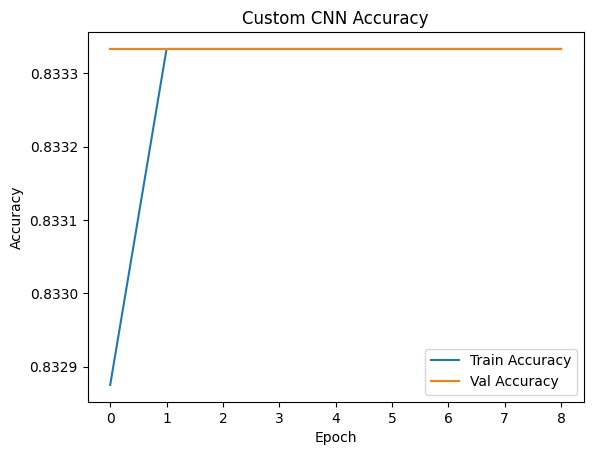

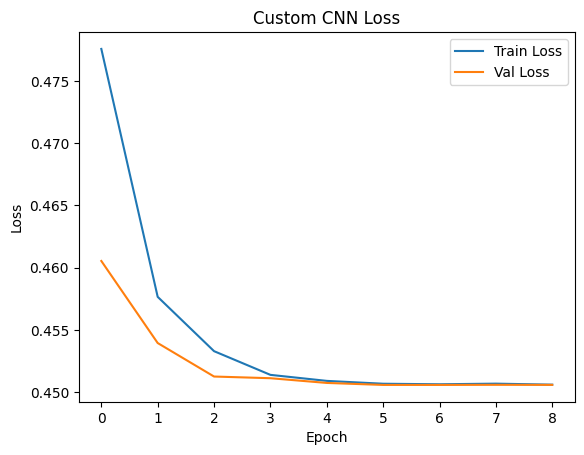

In [37]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Custom CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Custom CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Transfer Learning

In [38]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

IMG_SIZE = 96
input_shape = (IMG_SIZE, IMG_SIZE, 3)

base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

model_tl = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_tl.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

model_tl.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [39]:
train_generator = train_datagen.flow_from_directory(
    'cifake_dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'cifake_dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

Found 96000 images belonging to 2 classes.
Found 24000 images belonging to 2 classes.


In [40]:
history_tl = model_tl.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, lr_schedule]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6000/6000 ━━━━━━━━━━━━━━━━━━━━ 948s 157ms/step - accuracy: 0.8237 - loss: 0.4968 - val_accuracy: 0.8332 - val_loss: 0.4647 - learning_rate: 0.0010
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 943s 157ms/step - accuracy: 0.8318 - loss: 0.4743 - val_accuracy: 0.8323 - val_loss: 0.4716 - learning_rate: 0.0010
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8316 - loss: 0.4746
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 884s 147ms/step - accuracy: 0.8316 - loss: 0.4746 - val_accuracy: 0.8333 - val_loss: 0.4669 - learning_rate: 0.0010
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 879s 146ms/step - accuracy: 0.8344 - loss: 0.4623 - val_accuracy: 0.8333 - val_loss: 0.4654 - learning_rate: 5.0000e-04


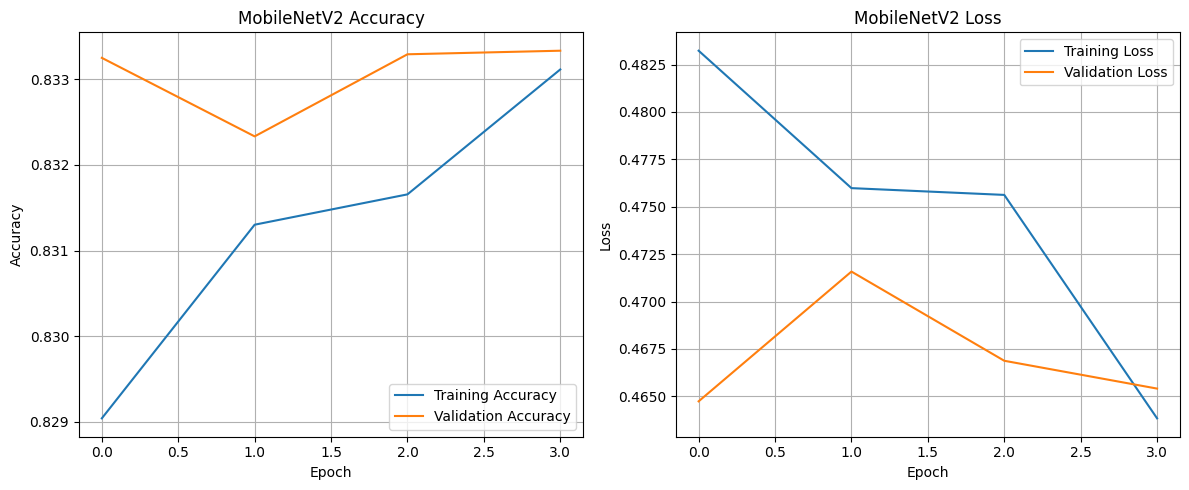

In [41]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_tl.history['accuracy'], label='Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
